# Energía de explosión de un gas comprimido 


## Modelo
Determina la energía de explosión y la masa equivalente de TNT de una explosión de gas comprimido



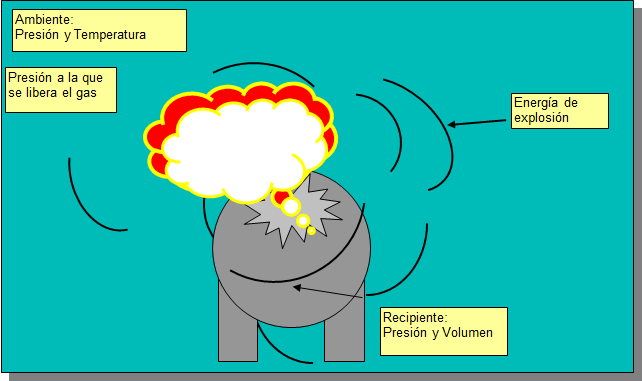

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|ETNT|		Calor de combustión del TNT	|	kJ/kg|
|Rg	|	Constante de los gases		|	BTU/Lbmol °R|
|Rg'|		Constante de los gases	|	J/mol K|
|Po	|	Presión ambiental		|	bar|
|P1|		Presión en el recipiente		|	bar|
|VR	|	Volumen del recipiente		|	m^3|
|$\gamma$|		Relación de Cp/Cv		|1.4|	
|P2	|	Presión final del gas expandido		|	bar|
|Ta	|	Temperatura ambiente		|°C|



### Incógnitas
|Variable|Significado|Unidades|
|------|------|------|
|W|		Masa equivalente de TNT	|kg|
|E		|Energía de explosión	|J|



### Consideraciones 
- Se asume que existe una equivalencia entre un material inflamable y el TNT
- Se tienen 3 modelos:
  - Adiabático. Considera que la expansión del gas se realiza a volumen constante
  - Isotérmico. Asume que la expansión del gas se realiza isotérmicamente
  - Energía disponible. Representa la máxima energía mecánica que puede obtenerse de un material

     - El resultado con el modelo de Energía disponible es menor que el isotérmico, pero mayor que el adiabático











## Desarrollo y ecuaciones

### Método adiabático

Este método es el más simple. Este modelo determina la energía requerida para expandir un gas desde una presión atmosférica hasta la presión inicial a volumen constante, a través de la siguiente relación:

- Ecuación 1. $E=\frac{(P_1-P_0 )V_R}{\gamma -1} $

Para calcular la masa equivalente se usa la siguiente ecuación:

-Ecuación 2. $W_{TNT}=\frac{E}{E_{TNT}}$

### Método isotérmico

Asume que la expansión ocurre isotérmica, además de que se trata de un gas ideal:

- Ecuación 3. $W=1.39x10^{-6} V_R(\frac{P_1}{P_0})R_g T_0 ln(\frac{P_1}{P_2})$

Para calcular la energía equivalente se usa la siguiente ecuación:

-Ecuación 4. $E=W_{TNT}E_{TNT}$

### Método Energía disponible

Representa la máxima energía mecánica que puede obtenerse de un material. En el primer termino entre paréntesis de la expresión se tiene la expansión isotérmica. En el segundo termino entre paréntesis de la expresión representa la perdida de energía como resultado de la segunda ley de la termodinámica:

-Ecuación 5. $E=R_gT[ln(\frac{P_1}{P_0})-(1-\frac{P_0}{P})]$

Para calcular la mas equivalente en TNT se emplea la ecuación 2

## Resultados

### Método adiabático

In [2]:
E_TNT=4690000  #Kj/Kg
Rg=1.987       #BTU/lbmol°R
Rg_p=8.314     #J/molK
P0=1.01        #bar
P1=500         #bar
VR=1           #m^3
gamma=1.4      #adimensional
P2=1.01        #bar
Ta=25          #°C

Se calcula la energía de explosión.


Se usa un parámetro para escalar la sobrepresión:

In [3]:
E_a=((P1-P0)*100000*VR)/(gamma-1)
print("Energía explosion adiabática= "+ str(round(E_a,2))+" J")

Energía explosion adiabática= 124747500.0 J


Se calcula la masa equivalente de TNT:

In [4]:
W_a=E_a/E_TNT
print("W Adiabático= "+ str(round(W_a,2))+" Kg")

W Adiabático= 26.6 Kg


### Método Isotérmico

Se calcula la masa equivalente de TNT

In [5]:
import numpy as np
W_I=1.39*10**-6*VR*35.31*(P1/P0)*Rg*(Ta*1.8+32+460)*np.log(P1/P2)/2.205
print("W Isotérmico= "+ str(round(W_I,2))+" Kg")

W Isotérmico= 72.95 Kg


Se calcula la energía de explosión

In [6]:
E_I=W_I*E_TNT
print("Energía explosion isotérmica= " + str(round(E_I,2))+" J")

Energía explosion isotérmica= 342149084.33 J


### Método Energía disponible

In [7]:
import numpy as np #raro REVISAR

E_ED=(P1*100000*VR/8.314/(Ta+273.15))*Rg_p*(Ta+273.15)*(np.log(P1/P0)-(1-(P0/P1)))
print("Energía explosion (Energia disponible)= " + str(round(E_ED,2))+" J")

Energía explosion (Energia disponible)= 260333888.38 J


In [8]:
W_TNT_ED=E_ED/E_TNT
print("W (Energia disponible)= "+ str(round(W_TNT_ED,2))+" Kg")

W (Energia disponible)= 55.51 Kg


## Resultados

In [28]:
met=np.array(["Adiabático","Isotérmico","E. Dispon"])
masatot=np.array([W_a,W_I,W_TNT_ED])
enertot=np.array([E_a,E_I,E_ED])



print('{:^10}''{:^10}''{:^10}'.format('Método ',' M TNT[Kg]',' E explosion[J]'))

for i in range(len(met)):
    print('{:^10}''{:^10.2f}''{:^10.2f}'.format(met[i],     masatot[i],        enertot[i]))

 Método    M TNT[Kg] E explosion[J]
Adiabático  26.60   124747500.00
Isotérmico  72.95   342149084.33
E. Dispon   55.51   260333888.38
